# Loading Data into Google Cloud

In [8]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 812M/812M [00:37<00:00, 23.4MB/s]
100% 812M/812M [00:37<00:00, 22.5MB/s]


In [9]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [10]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [11]:
import os, shutil

In [12]:
original_dataset_dir = 'train'

# The directory where we will
# store our smaller dataset
base_dir = '/cats_and_dogs_small'
try:
  os.mkdir(base_dir)
except:
  pass

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except:
  pass

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except:
  pass

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
  os.mkdir(validation_cats_dir)
except:
  pass

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass



# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [13]:
print("Number of training cat images:", len(os.listdir(train_cats_dir)))
print("Number of training dogs images:", len(os.listdir(train_dogs_dir)))
print("Number of Validation cat images:", len(os.listdir(validation_cats_dir)))
print("Number of Validation cat images:", len(os.listdir(validation_dogs_dir)))

Number of training cat images: 10000
Number of training dogs images: 10000
Number of Validation cat images: 2500
Number of Validation cat images: 2500


# Data Preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 100,
    class_mode = 'binary'
)

validation_genertor = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 100,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Model

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session

In [17]:
# remove previous model
clear_session()

# Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [18]:
# Compiling the Model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

## Model Summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Model Architecture

In [20]:
from tensorflow.keras.utils import plot_model

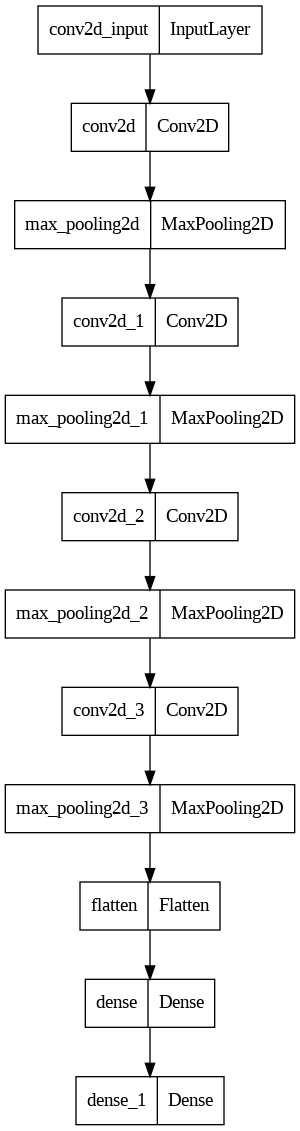

In [21]:
plot_model(model)

# Training the Model

In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 200,
    validation_data = validation_genertor,
    validation_steps = 50,
    epochs = 50
)

<ipython-input-22-ec672d18d429>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
200/200 [==============================] - 55s 212ms/step - loss: 0.6445 - acc: 0.6051 - val_loss: 0.5741 - val_acc: 0.6946
Epoch 2/50
200/200 [==============================] - 43s 215ms/step - loss: 0.5332 - acc: 0.7316 - val_loss: 0.5500 - val_acc: 0.7094
Epoch 3/50
200/200 [==============================] - 43s 213ms/step - loss: 0.4479 - acc: 0.7894 - val_loss: 0.4066 - val_acc: 0.8150
Epoch 4/50
200/200 [==============================] - 44s 217ms/step - loss: 0.3749 - acc: 0.8328 - val_loss: 0.3571 - val_acc: 0.8420
Epoch 5/50
200/200 [==============================] - 44s 219ms/step - loss: 0.3202 - acc: 0.8603 - val_loss: 0.3184 - val_acc: 0.8612
Epoch 6/50
200/200 [==============================] - 43s 215ms/step - loss: 0.2726 - acc: 0.8827 - val_loss: 0.3194 - val_acc: 0.8588
Epoch 7/50
200/200 [==============================] - 43s 214ms/step - loss: 0.2257 - acc: 0.9064 - val_loss: 0.2907 - val_acc: 0.8772
Epoch 8/50
200/200 [==============================] - 4

# Training vs Validation Accuracy

In [23]:
import matplotlib.pyplot as plt

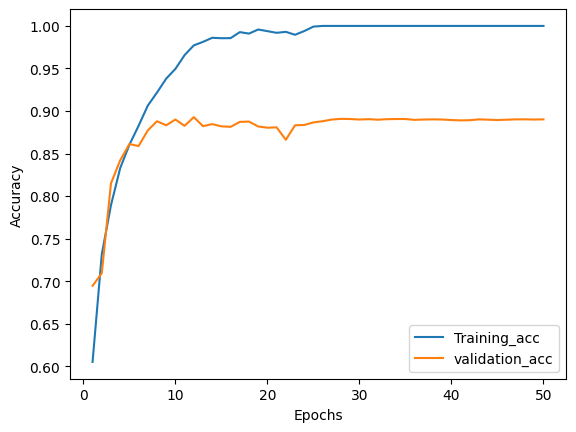

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training_acc')
plt.plot(epochs, val_acc, label='validation_acc')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Training vs Validation Loss

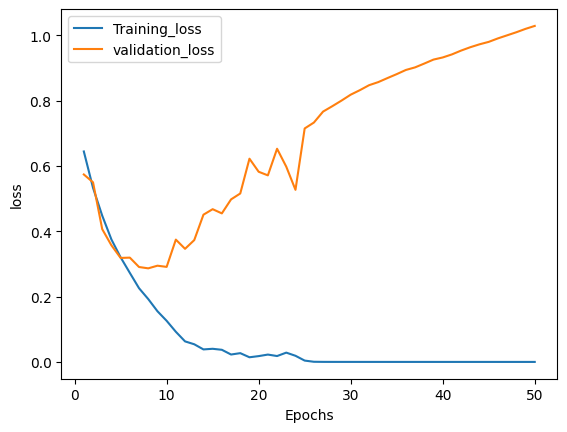

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training_loss')
plt.plot(epochs, val_loss, label='validation_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

The model overfit training data after 5 epochs

# Another Model

Adding Dropout layers to regularize the model to try to prevent overfitting.

In [30]:
# remove previous model
clear_session()

# Model
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [31]:
# Compiling the Model
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [32]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

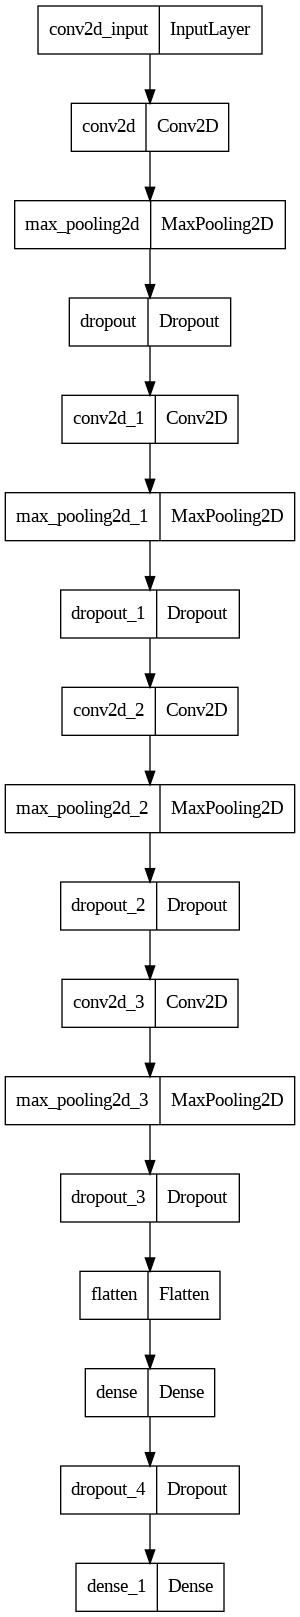

In [33]:
plot_model(model2)

In [34]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch = 200,
    validation_data = validation_genertor,
    validation_steps = 50,
    epochs = 30
)

Epoch 1/30
200/200 [==============================] - 47s 223ms/step - loss: 0.6887 - acc: 0.5512 - val_loss: 0.6340 - val_acc: 0.6304
Epoch 2/30
200/200 [==============================] - 44s 219ms/step - loss: 0.6078 - acc: 0.6575 - val_loss: 0.5624 - val_acc: 0.7194
Epoch 3/30
200/200 [==============================] - 44s 219ms/step - loss: 0.5285 - acc: 0.7329 - val_loss: 0.4866 - val_acc: 0.7606
Epoch 4/30
200/200 [==============================] - 44s 219ms/step - loss: 0.4656 - acc: 0.7781 - val_loss: 0.4662 - val_acc: 0.7778
Epoch 5/30
200/200 [==============================] - 45s 224ms/step - loss: 0.4048 - acc: 0.8178 - val_loss: 0.3741 - val_acc: 0.8322
Epoch 6/30
200/200 [==============================] - 45s 224ms/step - loss: 0.3608 - acc: 0.8388 - val_loss: 0.3496 - val_acc: 0.8454
Epoch 7/30
200/200 [==============================] - 46s 231ms/step - loss: 0.3229 - acc: 0.8590 - val_loss: 0.3158 - val_acc: 0.8624
Epoch 8/30
200/200 [==============================] - 4

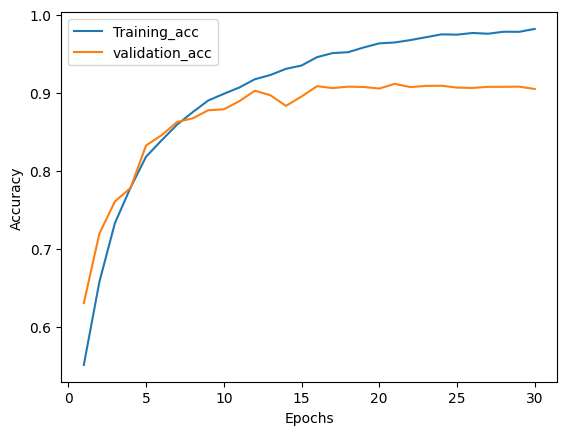

In [35]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training_acc')
plt.plot(epochs, val_acc, label='validation_acc')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

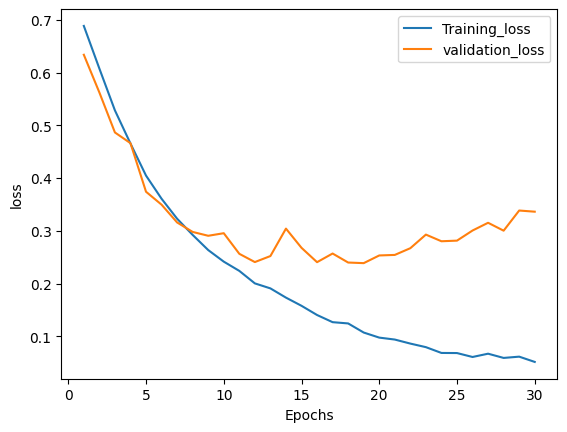

In [36]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training_loss')
plt.plot(epochs, val_loss, label='validation_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

It is still overfitting but better than the previous model.
Loss decreased and accuracy increases a little.

# Third Model

Changing batch size to 50

In [37]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 50,
    class_mode = 'binary'
)

validation_genertor = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 50,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [38]:
# remove previous model
clear_session()

# Model
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [39]:
# Compiling the Model
model3.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [41]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

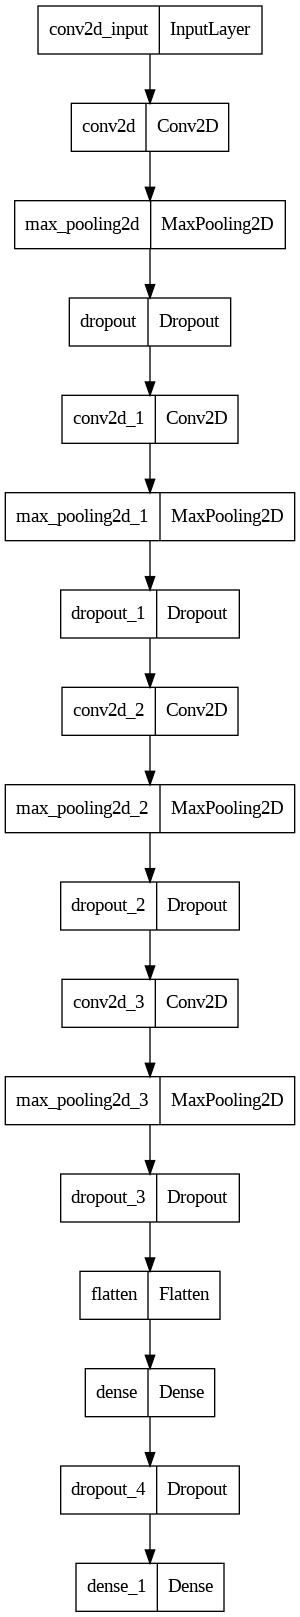

In [42]:
plot_model(model3)

In [43]:
history3 = model3.fit(
    train_generator,
    steps_per_epoch = 400,
    validation_data = validation_genertor,
    validation_steps = 100,
    epochs = 30
)

Epoch 1/30
400/400 [==============================] - 53s 124ms/step - loss: 0.6873 - acc: 0.5497 - val_loss: 0.6694 - val_acc: 0.5904
Epoch 2/30
400/400 [==============================] - 46s 116ms/step - loss: 0.6286 - acc: 0.6360 - val_loss: 0.5554 - val_acc: 0.7180
Epoch 3/30
400/400 [==============================] - 49s 123ms/step - loss: 0.5306 - acc: 0.7353 - val_loss: 0.4749 - val_acc: 0.7702
Epoch 4/30
400/400 [==============================] - 44s 111ms/step - loss: 0.4535 - acc: 0.7868 - val_loss: 0.4115 - val_acc: 0.8094
Epoch 5/30
400/400 [==============================] - 45s 113ms/step - loss: 0.3957 - acc: 0.8227 - val_loss: 0.3600 - val_acc: 0.8468
Epoch 6/30
400/400 [==============================] - 45s 112ms/step - loss: 0.3558 - acc: 0.8450 - val_loss: 0.3580 - val_acc: 0.8458
Epoch 7/30
400/400 [==============================] - 44s 111ms/step - loss: 0.3113 - acc: 0.8659 - val_loss: 0.2893 - val_acc: 0.8770
Epoch 8/30
400/400 [==============================] - 4

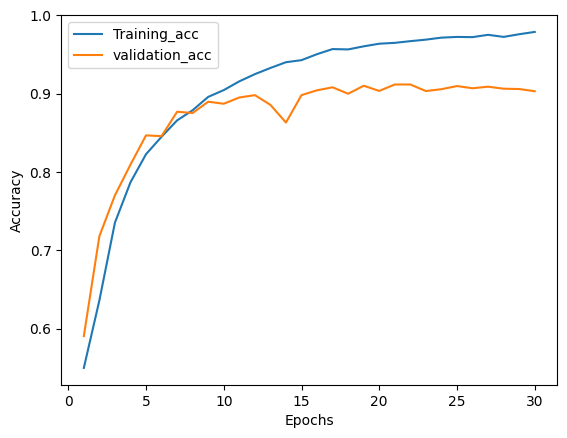

In [51]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training_acc')
plt.plot(epochs, val_acc, label='validation_acc')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

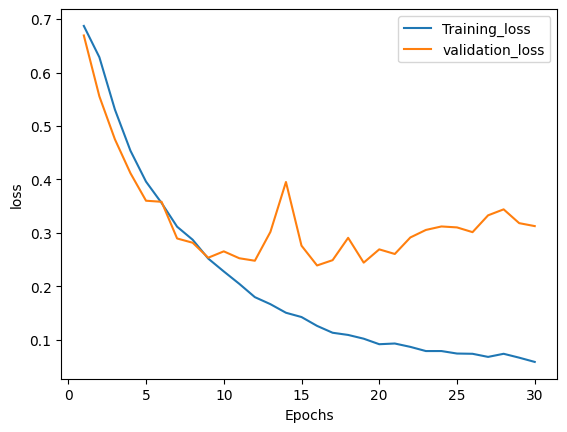

In [52]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training_loss')
plt.plot(epochs, val_loss, label='validation_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

# Final Model

Let's increase the model size

In [46]:
# remove previous model
clear_session()

# Model
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compiling the Model
model4.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [47]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

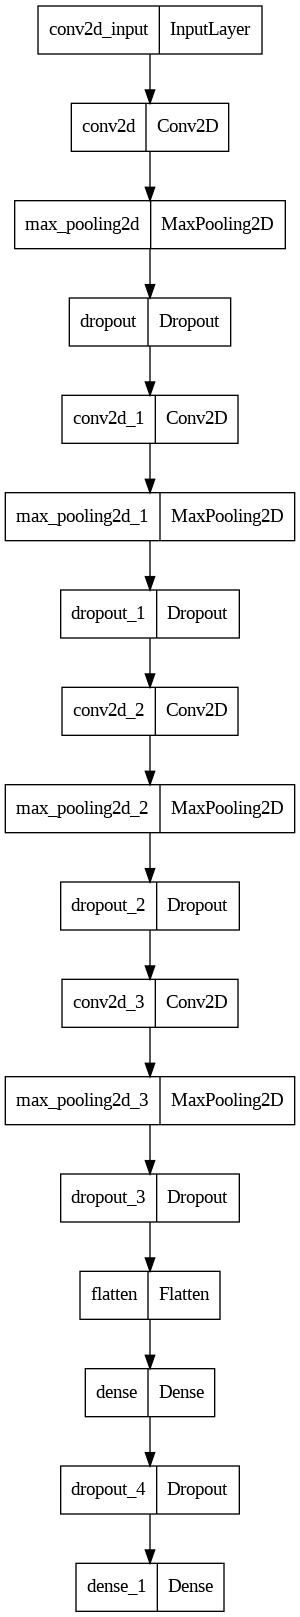

In [48]:
plot_model(model4)

In [49]:
history4 = model4.fit(
    train_generator,
    steps_per_epoch = 400,
    validation_data = validation_genertor,
    validation_steps = 100,
    epochs = 30
)

Epoch 1/30
400/400 [==============================] - 51s 120ms/step - loss: 0.7009 - acc: 0.5426 - val_loss: 0.6538 - val_acc: 0.6120
Epoch 2/30
400/400 [==============================] - 48s 120ms/step - loss: 0.6239 - acc: 0.6407 - val_loss: 0.6149 - val_acc: 0.6738
Epoch 3/30
400/400 [==============================] - 45s 113ms/step - loss: 0.5465 - acc: 0.7199 - val_loss: 0.5146 - val_acc: 0.7412
Epoch 4/30
400/400 [==============================] - 46s 114ms/step - loss: 0.4809 - acc: 0.7661 - val_loss: 0.4554 - val_acc: 0.7768
Epoch 5/30
400/400 [==============================] - 48s 119ms/step - loss: 0.4233 - acc: 0.8031 - val_loss: 0.4024 - val_acc: 0.8156
Epoch 6/30
400/400 [==============================] - 46s 114ms/step - loss: 0.3818 - acc: 0.8267 - val_loss: 0.3533 - val_acc: 0.8398
Epoch 7/30
400/400 [==============================] - 45s 112ms/step - loss: 0.3379 - acc: 0.8512 - val_loss: 0.3329 - val_acc: 0.8484
Epoch 8/30
400/400 [==============================] - 4

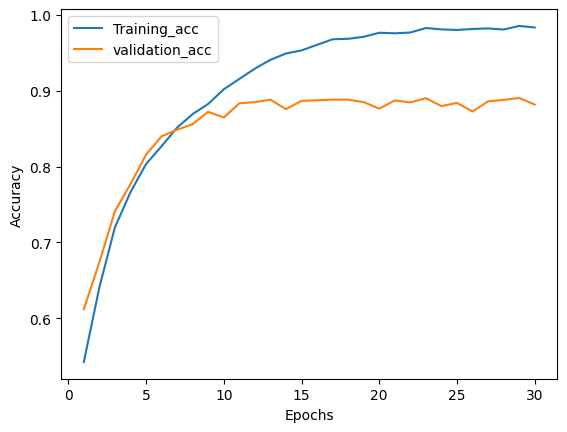

In [50]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training_acc')
plt.plot(epochs, val_acc, label='validation_acc')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

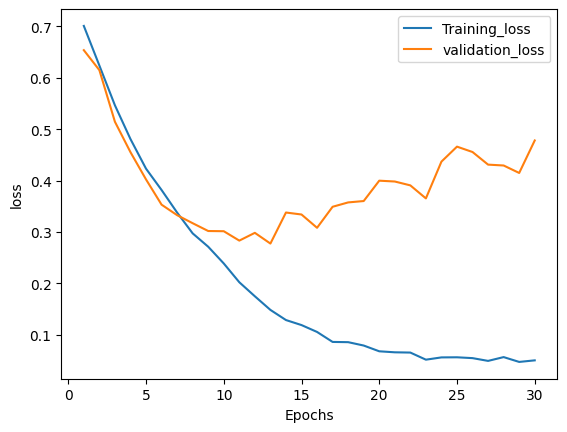

In [53]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training_loss')
plt.plot(epochs, val_loss, label='validation_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

The second model is the best one of the four with val_acc 90%